# Tutorial 2: Part 2

Objectives:
- Introduce sextupoles in our FODO lattice for chromaticity correction.
- Impact of sextupoles on the phase space with and without chromaticity correction.

<div>
<img src="attachment:chromaticity-jerald-pinson-6000.jpg" width="300"/>
</div>

<div>
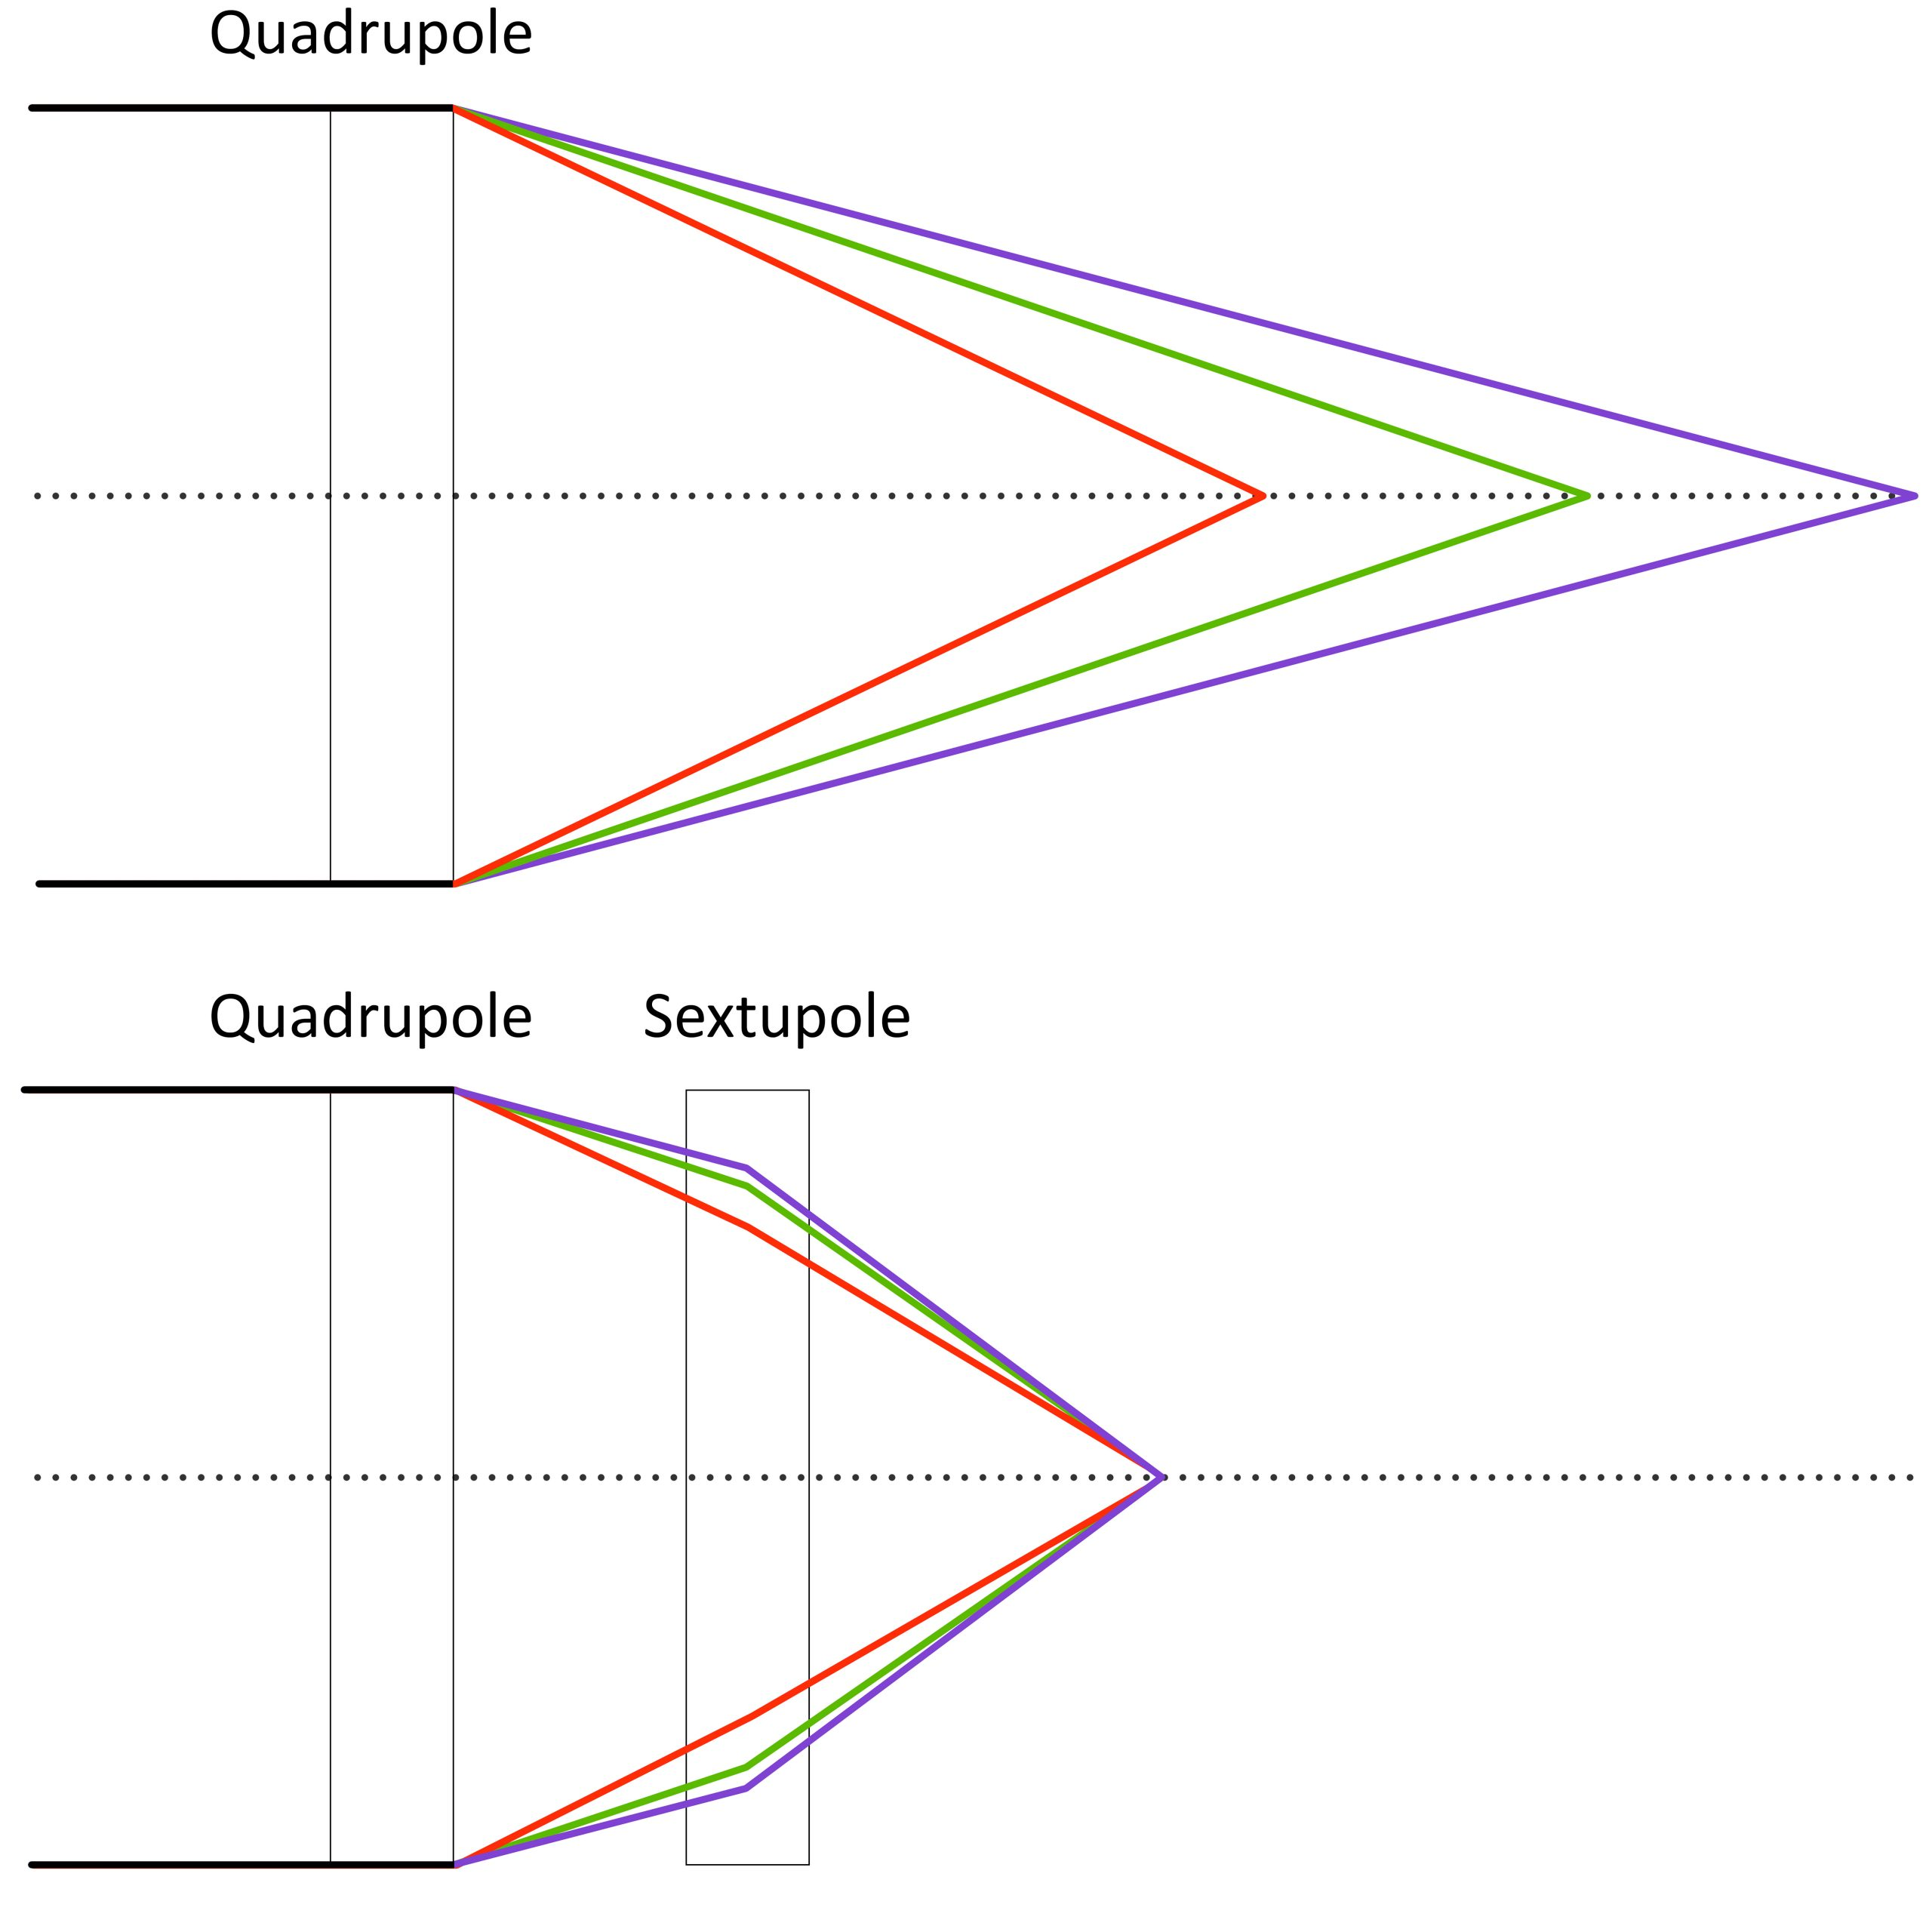
</div>

**Non-linearities**

1. Add 0.5 m long sextupole attached to the two qudrupoles. With a matching block adjust the vertical and horizontal chromaticity of the cell (global parameters: DQ1 and DQ2) to zero, by powering the two sextupoles ($K2_1$ and $K2_1$).

        !In the mgnet definition section:
        SF: SEXTUPOLE, L:=??, K2:=??;
        SD: SEXTUPOLE, L:=??, K2:=??;
        
        !In the sequence:
        S2 : SD, at=??;
        
<div>
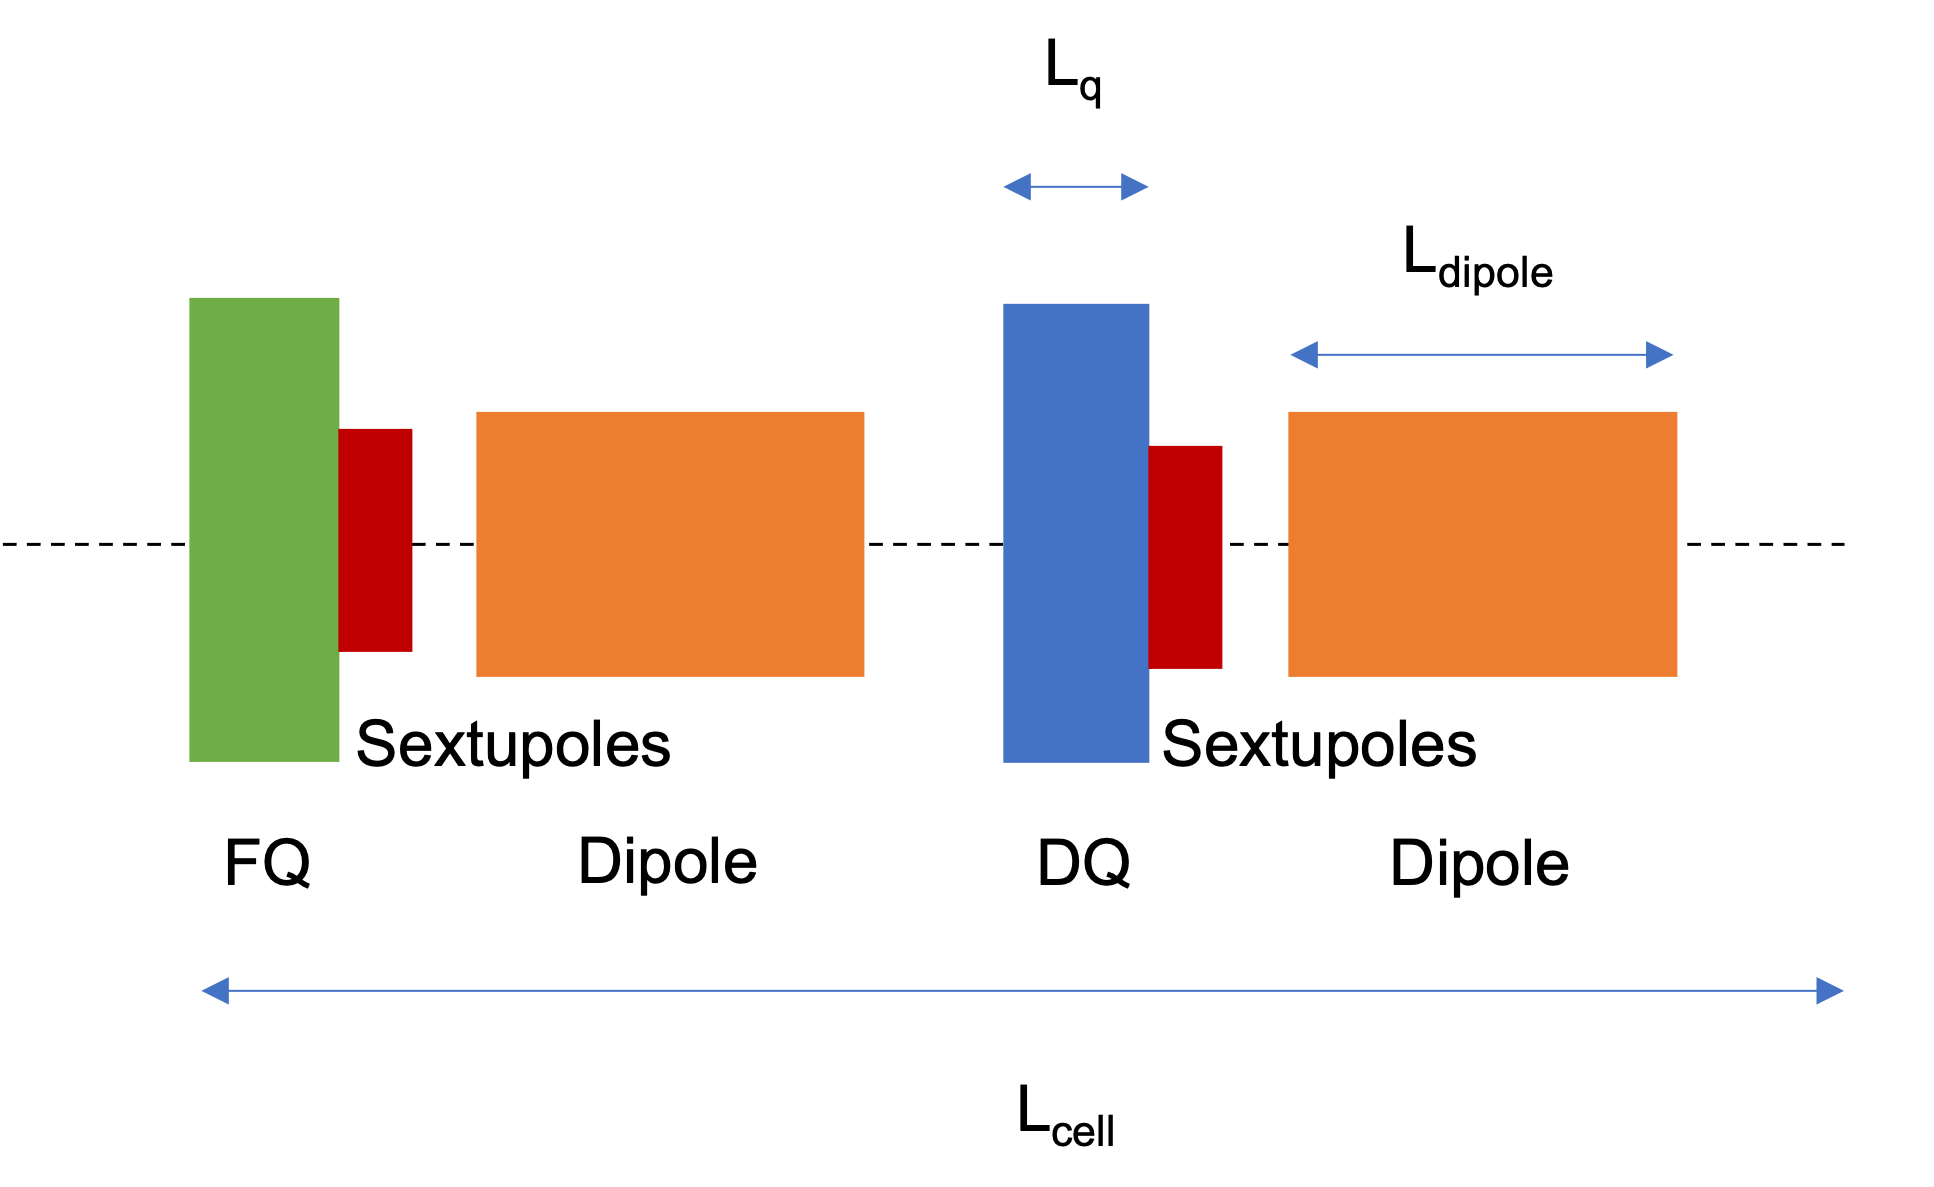
</div>     

2. Using the $K2_1$ and $K2_1$, $\beta$-function and dispersion at the sextupole location, evaluate using the formula the sextupolar effect on the Q1 for a particle at DELTAP=0.01. Compare with the results obtained in the Tutorial 2: Part 1.


3. Track a particle with initial coordinates x,y,px,py = (1,1,0,0) mm in 100 cells and DELTAP=0.01. Plot the x-px phase space. Did you manage to recover the original tune for the off-momentum particle? 
    
**REMEMEBER** to make thin your lattice to use the TRACK command.

        track, dump;    
        start, x=1e-3, px=0, y=1e-3, py=0;    
        run, turns=100;   
        endtrack; 
        
4. Track a particle with initial coordinates x,y,px,py=(100,100,0,0). How does the particle move in the phase space, cell after cell? Do you see the tunes? What is going on?


5. Move the tunes to (0.23, 0.23) and repeat the previous point. Is now the prticle stable?

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from cpymad.madx import Madx 

In [2]:
myMad = Madx(stdout=True)

1. Add 0.5 m long sextupole attached to the two qudrupoles. With a matching block adjust the vertical and horizontal chromaticity of the cell (global parameters: DQ1 and DQ2) to zero, by powering the two sextupoles (𝐾21 and 𝐾21).

In [4]:
myMad = Madx(stdout=True)
myString='''
! *********************************************************************
! Definition of parameters
! *********************************************************************
!! General parameters
Lcell = ??;
nBend=??;

!! Dipole Parameters
Ld = ??;
Ad = ??;

!! Quadrupole Parameters
K1F = ??;
K1D = ??;
Lq =??;

!! Sextupole Parameters
K2F = ??;
K2D = ??;
Ls = ??;

! *********************************************************************
! Definition of magnets
! ********************************************************************* 

QF: QUADRUPOLE, L:=Lq, K1:=K1F;
QD: QUADRUPOLE, L:=Lq, K1:=K1D;
BM: SBEND, L=Ld, angle:=Ad;
SF: ??;
SD: SEXTUPOLE, L:=Ls, K2:=K2D;

! *********************************************************************
! Definition of sequence
! *********************************************************************

JUAS: SEQUENCE, REFER=center, L=??; !it is important to refer to the the center this time, to make it compatible with the makethin 
qf: QF, at=0+QF->L/2;
S1 : ??;
b1:  BM, at=10+BM->L/2;
b2:  BM, at=30+BM->L/2;
qd: QD, at=50+QD->L/2;
S2 : ??;
b3:  BM, at=60+BM->L/2;
b4:  BM, at=80+BM->L/2;
ENDSEQUENCE;

! *********************************************************************
! Definition of beam
! *********************************************************************

beam, particle=proton, energy=7000;

! *********************************************************************
! ACTIVATE SEQUENCE
! *********************************************************************

use, sequence=JUAS;

! *********************************************************************
! TWISS
! *********************************************************************

twiss, table= thick_sequence;

! *********************************************************************
! MAKETHIN
! *********************************************************************

MAKETHIN, SEQUENCE=JUAS;

! *********************************************************************
! ACTIVATE SEQUENCE
! *********************************************************************

use, sequence=JUAS;

! *********************************************************************
! ACTIVATE SEQUENCE
! *********************************************************************

twiss, table= thin_sequence;

//*************************************************//
!   MATCHING OF THE TUNES
//*************************************************//
match, sequence=JUAS;
!! Variables
vary,name=K1F,step=0.0001;
vary,name=K1D,step=0.0001;
!! Constraints
global, Q1=0.25;
global, Q2=0.25;
!! The next line ask MAD-X to do the matching itself
LMDIF, calls = 1000, tolerance=1E-12;
endmatch;

! *********************************************************************
! TWISS
! *********************************************************************

twiss, table=thin_new_wp;
'''
myMad.input(myString);

In [ ]:
# What are the horizontal and vertical natural chromaticities
thinNonZeroChromaDFTable=myMad.table['summ'].dframe()

# MATCHING AND CORRECTION
2. Using the 𝐾21 and 𝐾21, 𝛽-function and dispersion at the sextupole location, evaluate using the formula the sextupolar effect on the Q1 for a particle at DELTAP=0.01. Compare with the results obtained in the Tutorial 2: Part 1.

Sextupoles are needed for chromaticity correction...but they introduce non-linear fields which induces non-linear motion (resonances, tune shifts, chaotic motion...).

In [8]:
myString='''
//*************************************************//
!   MATCHING OF THE CHROMATICITY
//*************************************************//
match, sequence=JUAS;
!!! Variables
vary,name=??,step=0.0001;
vary,name=??,step=0.0001;
!!! Constraints
global, dq1=??; ! Chromaticities set to 0
global, dq2=??;
!!! The next line ask MAD-X to do the matching itself
LMDIF, calls = 100, tolerance=1E-12;
endmatch;
'''
myMad.input(myString);

In [9]:
myString='''
//*************************************************//
!   TWISS
//*************************************************//
SELECT,FLAG=TWISS, column=name,s,betx,bety,dx,K1L,K2L;
twiss,file="Tutorial2_Part2.txt";
!plot, HAXIS=s, VAXIS=betx,bety,dx,dy,colour=100, interpolate;
'''
myMad.input(myString);
thinZeroChromaDFTable=myMad.table['twiss'].dframe()

Sextupoles contribution to the chromaticity from the formulas:
$\xi = \frac{1}{4*\pi}*(\beta_{x,S1}*K2_1*Dx_{S1}+\beta_{x,S2}*K2_2*Dx_{S2})$

In [10]:
thinZeroChromaDFTable[['name','s','betx','dx','k2l']]

,name,s,betx,dx,k2l
#s,juas$start:1,0.00,158.844214,2.229002,0.000000
drift_0[0],drift_0:0,2.50,170.657782,2.310670,0.000000
qf,qf:1,2.50,170.657782,2.310670,0.000000
drift_1[0],drift_1:0,5.25,157.690336,2.220835,0.000000
s1,s1:1,5.25,157.690336,2.220835,0.014310
drift_2[0],drift_2:0,10.00,136.715911,2.065666,0.000000
b1_den,b1_den:1,10.00,136.715911,2.065666,0.000000
drift_3[0],drift_3:0,17.50,107.270538,1.820663,0.000000
b1,b1:1,17.50,107.270538,1.820663,0.000000
drift_4[0],drift_4:0,25.00,82.314836,1.639621,0.000000


In [4]:
# Computatio of the sextupoles contribution to the chromaticity


In [5]:
#dq1 before compensation


# Tracking after chromaticity correction
3.Track a particle with initial coordinates x,y,px,py = (1,1,0,0) mm in 100 cells and DELTAP=0.01. Plot the x-px phase space. Did you manage to recover the original tune for the off-momentum particle? 

In [13]:
myString='''
//*************************************************//
!   TRACKING
//*************************************************//
track,dump,file='withSextupoles', DELTAP=??;
start, x= ??, px=??, y= ??, py=??;
start, x= ??, px=??, y= ??, py=??;
run,turns=??;
endtrack;
!plot, file="MAD_track",table=track,haxis=x,vaxis=px,
!particle=1,2, colour=100;
!plot, file="MAD_track",table=track,haxis=y,vaxis=py,
!particle=1,2, colour=100;
'''
myMad.input(myString);

In [14]:
off_momentum_nonlinear_particle_1=myMad.table['track.obs0001.p0001'].dframe()
off_momentum_nonlinear_particle_2=myMad.table['track.obs0001.p0002'].dframe()

In [ ]:
%matplotlib notebook
myParticle=off_momentum_nonlinear_particle_1
plt.plot(off_momentum_nonlinear_particle_1['x'],off_momentum_nonlinear_particle_1['px'],'ob',label='X-phase space')
plt.plot(off_momentum_nonlinear_particle_1['y'],off_momentum_nonlinear_particle_1['px'],'.r',label='Y-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.grid()

In [6]:
#Did you recover the tune for on-momentum particles? Why?

4. Track a particle with initial coordinates x,y,px,py=(100,100,0,0). How does the particle move in the phase space, cell after cell? Do you see the tunes? What is going on?

In [ ]:
%matplotlib notebook
myParticle=off_momentum_nonlinear_particle_2
plt.plot(off_momentum_nonlinear_particle_2['x'],off_momentum_nonlinear_particle_2['px'],'ob',label='X-phase space')
plt.plot(off_momentum_nonlinear_particle_2['y'],off_momentum_nonlinear_particle_2['px'],'.r',label='Y-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.grid()

In [ ]:
%matplotlib notebook
plt.plot(off_momentum_nonlinear_particle_1['turn'],off_momentum_nonlinear_particle_1['x'],'.-b', label='Particle 1')
plt.plot(off_momentum_nonlinear_particle_2['turn'],off_momentum_nonlinear_particle_2['x'],'.-r', label='Particle 2' )
plt.xlabel('Turn')
plt.ylabel('[m]');
plt.legend(loc='best');
plt.ylim(-2,2)
plt.grid()

# Matching the tunes at (0.23,0.23)
5. Move the tunes to (0.23, 0.23) and repeat the previous point. Is now the particle stable?

In [20]:
myString='''
//*************************************************//
!   MATCHING OF THE TUNES
//*************************************************//
use, sequence=JUAS;

match, sequence=JUAS;
!! Variables
vary,name=??,step=0.0001;
vary,name=??,step=0.0001;
!! Constraints
global, Q1=??;
global, Q2=??;
!! The next line ask MAD-X to do the matching itself
LMDIF, calls = 1000, tolerance=1E-12;
endmatch;
'''
myMad.input(myString);

In [21]:
myString='''
//*************************************************//
!   TRACKING
//*************************************************//
track,dump,file='./firstpart/newWP', DELTAP=??;
start, x= ??, px=??, y= ??, py=??;
start, x= ??, px=??, y= ??, py=??;
run,turns=??;
endtrack;
!plot, file="MAD_track",table=track,haxis=x,vaxis=px,
!particle=1,2, colour=100;
!plot, file="MAD_track",table=track,haxis=y,vaxis=py,
!particle=1,2, colour=100;
'''
myMad.input(myString);

In [22]:
optWP_off_momentum_nonlinear_particle_1=myMad.table['track.obs0001.p0001'].dframe()
optWP_off_momentum_nonlinear_particle_2=myMad.table['track.obs0001.p0002'].dframe()

In [ ]:
%matplotlib notebook
myParticle=optWP_off_momentum_nonlinear_particle_2
plt.plot(myParticle['x'],myParticle['px'],'ob',label='X-phase space')
plt.plot(myParticle['y'],myParticle['px'],'.r',label='Y-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.grid()

In [ ]:
%matplotlib notebook
plt.plot(optWP_off_momentum_nonlinear_particle_1['turn'],optWP_off_momentum_nonlinear_particle_1['x'],'.-b', label='Particle 1')
plt.plot(optWP_off_momentum_nonlinear_particle_2['turn'],optWP_off_momentum_nonlinear_particle_2['x'],'.-r', label='Particle 2' )
plt.xlabel('Turn')
plt.ylabel('[m]');
plt.legend(loc='best');
plt.ylim(-2,2)
plt.grid()

What happened and why?